In [1]:
from model import MLProphet
from data_extract import extract, yahoo
from sklearn.metrics import r2_score

Importing plotly failed. Interactive plots will not work.


In [2]:
feature = ['High','Low','Close','Adj Close','Volume']
label=['Open']
ticker = 'MSFT'
train_start = '2008-01-01'
train_end = '2021-12-31'
pred_start = '2021-12-31'
pred_end = '2022-01-23'

In [3]:
yh = yahoo(ticker, train_start, train_end)
data_yh_train = yh.collect_data()
train = MLProphet(data_yh_train, feature, label)
model = train.model_fit()

yh = yahoo(ticker, pred_start, pred_end)
data_yh_pred = yh.collect_data()
pred = MLProphet(data_yh_pred, feature, label)
forecast = pred.model_predict(model)

[*********************100%***********************]  1 of 1 completed


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[*********************100%***********************]  1 of 1 completed


In [4]:
import matplotlib.pyplot as plt

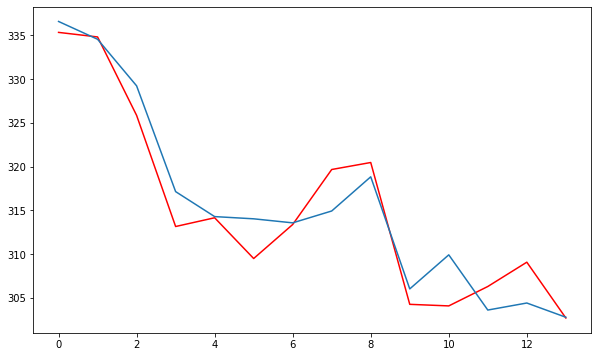

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(forecast['y_true'], color='r')
plt.plot(forecast['yhat'])

In [6]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Adj Close,Adj Close_lower,Adj Close_upper,Close,...,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y_true
0,2021-12-31,71.904793,335.286233,337.874603,71.904793,71.904793,30.579847,30.579847,30.579847,181.164788,...,6.894834,6.894834,-0.070310,-0.070310,-0.070310,0.0,0.0,0.0,336.599840,335.350006
1,2022-01-03,71.908877,333.268931,335.905531,71.908877,71.908877,30.397794,30.397794,30.397794,180.067252,...,7.026565,7.026565,-0.061008,-0.061008,-0.061008,0.0,0.0,0.0,334.562559,334.829987
2,2022-01-04,71.910238,327.962718,330.616320,71.910238,71.910238,29.732206,29.732206,29.732206,176.054630,...,6.989581,6.989581,-0.054717,-0.054717,-0.054717,0.0,0.0,0.0,329.237492,325.859985
3,2022-01-05,71.911600,315.840130,318.465604,71.911600,71.911600,28.267679,28.267679,28.267679,167.225445,...,6.938505,6.938505,-0.046898,-0.046898,-0.046898,0.0,0.0,0.0,317.140149,313.149994
4,2022-01-06,71.912961,313.002853,315.679153,71.912961,71.912961,27.977788,27.977788,27.977788,165.477785,...,7.012208,7.012208,-0.037631,-0.037631,-0.037631,0.0,0.0,0.0,314.284002,314.149994
5,2022-01-07,71.914322,312.772156,315.358560,71.914322,71.914322,27.996341,27.996341,27.996341,165.589638,...,6.894834,6.894834,-0.027015,-0.027015,-0.027015,0.0,0.0,0.0,314.030200,309.489990
6,2022-01-10,71.918407,312.227286,314.881989,71.918407,71.918407,28.023010,28.023010,28.023010,165.750409,...,7.026565,7.026565,0.011615,0.011615,0.011615,0.0,0.0,0.0,313.568213,313.380005
7,2022-01-11,71.919768,313.644910,316.313506,71.919768,71.919768,28.105342,28.105342,28.105342,166.246760,...,6.989581,6.989581,0.026228,0.026228,0.026228,0.0,0.0,0.0,314.925240,319.670013
8,2022-01-12,71.921129,317.596041,320.182185,71.921129,71.921129,28.486833,28.486833,28.486833,168.546666,...,6.938505,6.938505,0.041411,0.041411,0.041411,0.0,0.0,0.0,318.834607,320.470001
9,2022-01-13,71.922491,304.664002,307.322840,71.922491,71.922491,26.924904,26.924904,26.924904,159.130270,...,7.012208,7.012208,0.056966,0.056966,0.056966,0.0,0.0,0.0,306.014614,304.250000


In [7]:
print(r2_score(forecast.y_true, forecast.yhat))

0.906638178474537
